### Classifier For Human Emotions using EEG data with Recurrent Neural Networks and a Random Forest Classifier.

First, we import all the libraries we would need

In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
import sklearn.decomposition
import sklearn.model_selection
import sklearn.tree
import sklearn.ensemble

Afterards, we read in the data and take a look at it to see any pre processing we might need to do

In [13]:
data = pd.read_csv("emotions.csv")
data

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


The last column of the data is in terms of strings (NEGATIVE, POSITIVE, NEUTRAL). To make it a bit easier for our model, we will change them into integers using a dictionary.


In [14]:
label_dict = { "NEGATIVE": 0, "NEUTRAL":1, "POSITIVE" : 2}

In [15]:
def preprocess_inputs(df):
  df = df.copy()
    
  df['label'] = df['label'].replace(label_dict)
    
  y = df['label'].copy()
  X = df.drop('label', axis=1).copy()

    
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)


    
  return X_train, X_test, y_train, y_test

In [16]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

Now, we print out the training input values to make sure our data processing was correct.

In [17]:
X_train

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
993,14.400,29.7,-112.0,18.50,22.9,-3.63000,-2.2200,-2.180,-3.240,-4.040,...,-50.0,150.00,-150.00,-150.00,150.00,63.6,83.80,-40.90,-40.90,83.80
1851,13.700,22.8,21.5,8.40,27.1,3.27000,1.1200,6.480,2.300,5.660,...,74.2,-76.00,-10.90,-10.90,-76.00,60.9,-60.40,-31.40,-31.40,-60.40
1253,-0.765,24.7,-578.0,11.90,27.9,-1.44000,-4.2000,-8.310,-4.340,4.040,...,-803.0,619.00,-331.00,-331.00,619.00,-551.0,545.00,-261.00,-261.00,545.00
1228,28.200,32.6,32.1,30.30,24.6,-0.00524,-0.0699,1.680,0.266,-4.470,...,167.0,-24.40,-18.10,-18.10,-24.40,181.0,4.94,-8.33,-8.33,4.94
1461,31.900,31.0,34.4,30.80,24.0,-4.74000,-1.4000,-0.351,-1.830,-5.390,...,130.0,-25.70,4.10,4.10,-25.70,131.0,-21.70,19.60,19.60,-21.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.820,32.9,-741.0,32.60,27.0,-0.41300,-2.6300,-87.300,-26.200,-3.350,...,-405.0,428.00,-160.00,-160.00,428.00,-468.0,451.00,-229.00,-229.00,451.00
1147,31.500,32.1,31.3,28.80,25.0,5.32000,-0.1400,1.370,5.610,8.300,...,132.0,-22.20,33.00,33.00,-22.20,148.0,-9.15,16.50,16.50,-9.15
1766,-11.800,26.3,-828.0,7.68,23.3,13.10000,-2.0100,21.900,2.890,-3.160,...,-579.0,640.00,-238.00,-238.00,640.00,-361.0,451.00,-195.00,-195.00,451.00
1122,27.600,32.2,28.8,25.60,24.1,-6.94000,1.0300,0.355,-8.380,-6.960,...,102.0,6.75,9.95,9.95,6.75,101.0,-25.90,42.90,42.90,-25.90


We will first use a Random Forest classifier as our baseline

In [18]:
def compute_accuracy(y_pred, y_true):
    return 1. - np.sum(y_pred != y_test) / y_test.shape[0]

In [22]:
rfc = sklearn.ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)
y_rfc_pred = rfc.predict(X_test)

Test accuracy: 98.1%


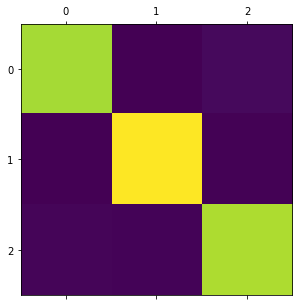

In [23]:
print('Test accuracy: {:.1%}'.format(compute_accuracy(y_rfc_pred, y_test)))
confusion_matrix = sklearn.metrics.confusion_matrix(y_rfc_pred, y_test)
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.matshow(confusion_matrix)

We now used the pickle library to save our random forest classifier since it has a high score and then we dont have to retrain our model every time.

In [42]:
import pickle

filename = 'emotions_rfc.sav'
pickle.dump(rfc, open(filename, 'wb'))

We can see that the random forest classifier did really well with a testing accuracy of 98.1%. Now, we will try a recurrent neural network and attempt to have it as close as possible to the random forest classifier.

In [24]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)
gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
flatten = tf.keras.layers.Flatten()(gru)
outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims_1 (TFOpLambd  (None, 2548, 1)          0         
 a)                                                              
                                                                 
 gru_1 (GRU)                 (None, 2548, 256)         198912    
                                                                 
 flatten_1 (Flatten)         (None, 652288)            0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1956867   
                                                                 
Total params: 2,155,779
Trainable params: 2,155,779
Non-trainable params: 0
_________________________________________________

In [25]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
38/38 [==============================] - 234s 6s/step - loss: 33.4592 - accuracy: 0.7703 - val_loss: 6.5884 - val_accuracy: 0.8763
Epoch 2/50
38/38 [==============================] - 283s 8s/step - loss: 4.0553 - accuracy: 0.9086 - val_loss: 11.3573 - val_accuracy: 0.7893
Epoch 3/50
38/38 [==============================] - 248s 7s/step - loss: 3.6945 - accuracy: 0.9363 - val_loss: 5.2991 - val_accuracy: 0.8796
Epoch 4/50
38/38 [==============================] - 236s 6s/step - loss: 1.1544 - accuracy: 0.9715 - val_loss: 2.0186 - val_accuracy: 0.9532
Epoch 5/50
38/38 [==============================] - 272s 7s/step - loss: 0.3182 - accuracy: 0.9874 - val_loss: 4.4359 - val_accuracy: 0.9365
Epoch 6/50
38/38 [==============================] - 263s 7s/step - loss: 2.0003 - accuracy: 0.9614 - val_loss: 11.1267 - val_accuracy: 0.8763
Epoch 7/50
38/38 [==============================] - 250s 7s/step - loss: 2.5861 - accuracy: 0.9614 - val_loss: 20.7456 - val_accuracy: 0.8696
Epoch 8/5

In [26]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 95.938%


Lets print the confusion matrix of our RNN

20/20 [==============================] - 38s 2s/step


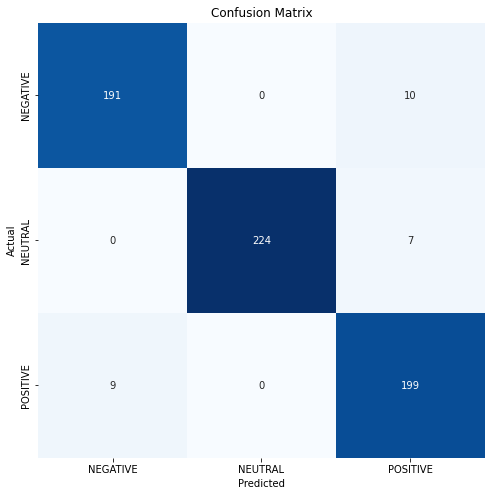

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.95      0.95      0.95       201
     NEUTRAL       1.00      0.97      0.98       231
    POSITIVE       0.92      0.96      0.94       208

    accuracy                           0.96       640
   macro avg       0.96      0.96      0.96       640
weighted avg       0.96      0.96      0.96       640



In [27]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_dict.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_dict.keys())
plt.yticks(np.arange(3) + 0.5, label_dict.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

Here we save our recurrent neural network. We did this so that we wont lose another model with a high test accuracy. We lost a model with 96.7% accuracy due to not saving it which taught us to start saving the most accurate models

In [28]:
from keras.models import load_model
    
model.save('emotion_classifier.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model
    
# returns a compiled model
# identical to the previous one
model = load_model('emotion_classifier.h5')

Here, we will search for what are the most important features using the random forest classifier.

In [29]:
rfc.feature_importances_

array([3.54441419e-02, 1.21206797e-03, 8.56547330e-03, ...,
       2.26423188e-05, 1.00649364e-05, 0.00000000e+00])

In [38]:
importance = rfc.feature_importances_
importance

array([3.54441419e-02, 1.21206797e-03, 8.56547330e-03, ...,
       2.26423188e-05, 1.00649364e-05, 0.00000000e+00])

Feature: 0, Score: 0.03544
Feature: 1, Score: 0.00121
Feature: 2, Score: 0.00857
Feature: 3, Score: 0.02671
Feature: 4, Score: 0.00119
Feature: 5, Score: 0.00020
Feature: 6, Score: 0.00005
Feature: 7, Score: 0.00012
Feature: 8, Score: 0.00014
Feature: 9, Score: 0.00003
Feature: 10, Score: 0.00761
Feature: 11, Score: 0.00171
Feature: 12, Score: 0.00834
Feature: 13, Score: 0.00368
Feature: 14, Score: 0.00009
Feature: 15, Score: 0.01218
Feature: 16, Score: 0.00041
Feature: 17, Score: 0.00347
Feature: 18, Score: 0.00484
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00586
Feature: 21, Score: 0.00051
Feature: 22, Score: 0.00072
Feature: 23, Score: 0.00077
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00793
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00383
Feature: 28, Score: 0.01048
Feature: 29, Score: 0.00017
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00016
Feature: 32, Score: 0.00002
Feature: 33, Score: 0.00009
Feature: 34, Score: 0.00011
Feature: 35, Score: 0.00000
Fe

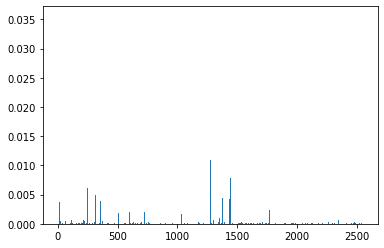

In [39]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [44]:
importance.max()

0.035444141913833736